<a href="https://colab.research.google.com/github/JSJeong-me/LiteLLM-OnDeive-App/blob/main/005-Segmentation-On-Device.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L2: Deploying Segmentation Models On-Device


<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>

[FFNet Paper](https://arxiv.org/abs/2206.08236)

In [ ]:
!pip install qai-hub-models

In [1]:
!pip install torchinfo

In [2]:
from qai_hub_models.models.ffnet_40s import Model

In [3]:
from torchinfo import summary

In [4]:
# Load from pre-trained weights
model = Model.from_pretrained()
input_shape = (1, 3, 1024, 2048)
stats = summary(model,
  input_size=input_shape,
  col_names=["num_params", "mult_adds"]
)
print(stats)

100%|██████████| 55.8M/55.8M [00:00<00:00, 73.7MB/s]


Done
cityscapes_segmentation requires repository https://github.com/Qualcomm-AI-research/FFNet.git . Ok to clone? [Y/n] y
Cloning https://github.com/Qualcomm-AI-research/FFNet.git to /root/.qaihm/models/cityscapes_segmentation/v2/Qualcomm-AI-research_FFNet_git...
Done
Loading pretrained model state dict from /root/.qaihm/models/ffnet/v1/ffnet40S/ffnet40S_dBBB_cityscapes_state_dict_quarts.pth
Initializing ffnnet40S_dBBB_mobile weights
Layer (type:depth-idx)                                       Param #                   Mult-Adds
FFNet40S                                                     --                        --
├─FFNet: 1-1                                                 --                        --
│    └─ResNetS: 2-1                                          --                        --
│    │    └─Conv2d: 3-1                                      864                       452,984,832
│    │    └─BatchNorm2d: 3-2                                 64                        64
│    │

## Exercise: Try another variant of FFNet

In [5]:
# High resolution variants
from qai_hub_models.models.ffnet_40s import Model
#from qai_hub_models.models.ffnet_54s import Model
#from qai_hub_models.models.ffnet_78s import Model

# Low resolution variants
low_res_input_shape = (1, 3, 512, 1024)
#from qai_hub_models.models.ffnet_78s_lowres import Model
#from qai_hub_models.models.ffnet_122ns_lowres import Model

model = Model.from_pretrained()
stats = summary(model,
  input_size=input_shape, # use low_res_input_shape for low_res models
  col_names=["num_params", "mult_adds"]
)
print(stats)

Loading pretrained model state dict from /root/.qaihm/models/ffnet/v1/ffnet40S/ffnet40S_dBBB_cityscapes_state_dict_quarts.pth
Initializing ffnnet40S_dBBB_mobile weights
Layer (type:depth-idx)                                       Param #                   Mult-Adds
FFNet40S                                                     --                        --
├─FFNet: 1-1                                                 --                        --
│    └─ResNetS: 2-1                                          --                        --
│    │    └─Conv2d: 3-1                                      864                       452,984,832
│    │    └─BatchNorm2d: 3-2                                 64                        64
│    │    └─ReLU: 3-3                                        --                        --
│    │    └─Conv2d: 3-4                                      18,432                    2,415,919,104
│    │    └─BatchNorm2d: 3-5                                 128                    

## Setup AI Hub for device-in-the-loop deployment

In [6]:
import qai_hub

<p style="background-color:#fff6ff; padding:15px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px"> 💻 &nbsp; <b>Access Utils File and Helper Functions:</b> To access the files for this notebook, 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>. For more help, please see the <em>"Appendix - Tips and Help"</em> Lesson.</p>

In [7]:
!pip install python-dotenv

In [ ]:
!pip install qai-hub
!qai-hub configure --api_token xxx

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Fyx8HkpGq8n3GaNgCTd0rFc44He_DJTU' -O utils.py

In [11]:
import os
from dotenv import load_dotenv, find_dotenv


def load_env():
    _ = load_dotenv(find_dotenv())

def get_ai_hub_api_token():
    load_env()
    ai_hub_api_token = os.getenv("AI_HUB_API_KEY")
    return ai_hub_api_token

In [ ]:
# from utils import get_ai_hub_api_token
ai_hub_api_token = get_ai_hub_api_token()

!qai-hub configure --api_token "xxx"

100%|██████████| 443k/443k [00:00<00:00, 7.50MB/s]


Done
Loading pretrained model state dict from /root/.qaihm/models/ffnet/v1/ffnet40S/ffnet40S_dBBB_cityscapes_state_dict_quarts.pth
Initializing ffnnet40S_dBBB_mobile weights
Running Inference on 0 samples


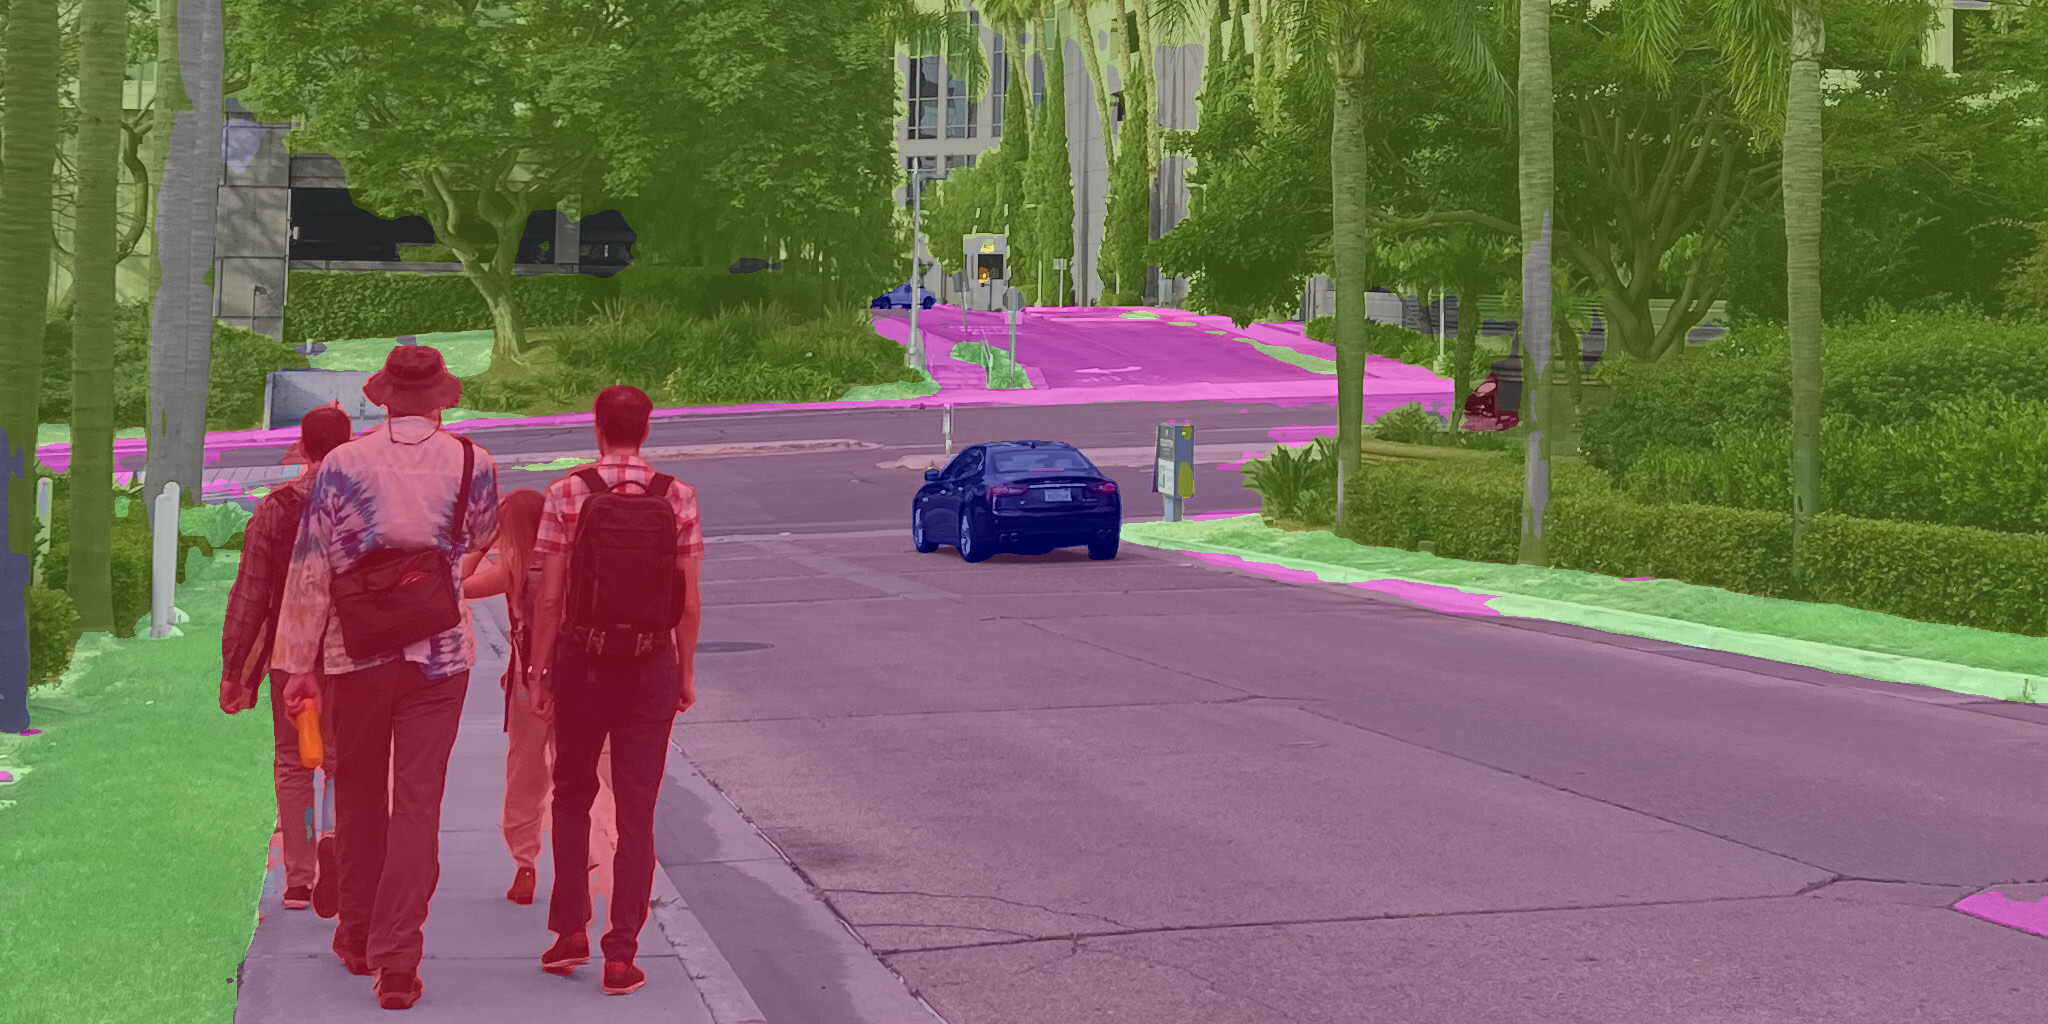

In [14]:
%run -m qai_hub_models.models.ffnet_40s.demo

## Run on a real smart phone!

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note:</b> To spread the load across various devices, we are selecting a random device. Feel free to change it to any other device you prefer.</p>

In [ ]:
devices = [
    "Samsung Galaxy S22 Ultra 5G",
    "Samsung Galaxy S22 5G",
    "Samsung Galaxy S22+ 5G",
    "Samsung Galaxy Tab S8",
    "Xiaomi 12",
    "Xiaomi 12 Pro",
    "Samsung Galaxy S22 5G",
    "Samsung Galaxy S23",
    "Samsung Galaxy S23+",
    "Samsung Galaxy S23 Ultra",
    "Samsung Galaxy S24",
    "Samsung Galaxy S24 Ultra",
    "Samsung Galaxy S24+",
]

import random
selected_device = random.choice(devices)
print(selected_device)

In [ ]:
%run -m qai_hub_models.models.ffnet_40s.demo -- --device "$selected_device" --on-device

<p style="background-color:#fff1d7; padding:15px; "> <b>Note</b>: To view the URL for each job, you require login. You can experience sample results in the following urls.</p>

* [FFNet 40s](https://aihub.qualcomm.com/mobile/models/ffnet_40s)
* [FFNet 54s](https://aihub.qualcomm.com/mobile/models/ffnet_54s)
* [FFNet 78s](https://aihub.qualcomm.com/mobile/models/ffnet_78s)
* [FFNet 78s-low-res](https://aihub.qualcomm.com/mobile/models/ffnet_78s_lowres)
* [FFNet 122ns-low-res](https://aihub.qualcomm.com/mobile/models/ffnet_122ns_lowres)

## On Device Demo

In [ ]:
%run -m qai_hub_models.models.ffnet_40s.demo -- --device "Samsung Galaxy S23" --on-device